In [224]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [225]:
df = pd.read_csv('data03.csv', sep = ';', names = ['x1', 'x2', 'k'])
df.head(5)

,x1,x2,k
0,0.141,0.508,0
1,0.243,0.353,0
2,0.494,0.787,1
3,0.235,0.854,0
4,0.150,0.064,0


In [226]:
def missing_values_table(df):
        miss = df.isnull().sum()
        percent = miss/len(df)*100
        miss_df = pd.concat([miss, percent], axis=1)
        miss_df = miss_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return miss_df

In [227]:
missing_values_table(df)

,Missing Values,% of Total Values
x1,0,0.0
x2,0,0.0
k,0,0.0


In [228]:
df_shuffled = shuffle(df, random_state=123)
train = df_shuffled[:int(len(df_shuffled)*0.8)]
test = df_shuffled[len(train):]

In [229]:
train

,x1,x2,k
8,0.244,0.988,0
70,0.464,0.086,0
82,0.227,0.228,0
28,0.256,0.364,0
63,0.924,0.299,1
...,...,...,...
48,0.916,0.419,1
61,0.537,0.795,1
93,0.183,0.261,0
99,0.768,0.973,1


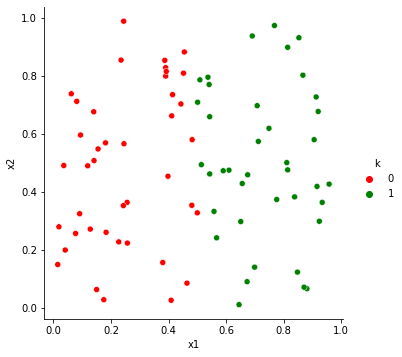

In [230]:
sns.pairplot(x_vars = ["x1"],
    y_vars = ["x2"],
    data = train,
    hue = "k",
    height = 5,
    palette = {0:"red", 1:"green"}
)

In [231]:
w = np.array([0.2, 0.2])
bias = -0.2

In [232]:
x = train[['x1', 'x2']].to_numpy()
k = train['k'].to_numpy()

In [233]:
def predict(w, x, bias):
    activation = np.dot(w, x) + bias
    if activation>=0: return 1
    else: return 0

In [234]:
frames=[]
x_plot = np.array([0.45, 0.55])
for j in range (0, 10):
    errors = 0
    frames.append(go.Frame(data=[go.Scatter(x=x_plot, y=-w[0]/w[1]*x_plot - bias/w[1])]))
    for i in range (len(train)):
        k_pred = predict (w, x[i], bias)
        if k[i] == 0 and k_pred == 1:
            errors = errors +1
            w = w -x[i]/np.linalg.norm(x[i])
            bias = bias - 1/np.linalg.norm(x[i])
        if k[i] == 1 and k_pred == 0:
            errors = errors + 1
            w = w + x[i]/np.linalg.norm(x[i])
            bias = bias + 1/np.linalg.norm(x[i])
    print("Step=%d, Errors=%d" % (j, errors))
    if errors == 0: break
            
        

Step=0, Errors=19
Step=1, Errors=0


In [235]:
def get_plot (df, w, bias):
    fig = plt.figure(figsize=(10,8))
    g = sns.pairplot(x_vars = ["x1"],
        y_vars = ["x2"],
        data = df,
        hue = "k",
        height = 5,
        palette = {0:"red", 1:"green"}
    )
    x_plot = np.linspace(min(df['x1']), max(df['x1']), 10)
    y_plot = -w[0]/w[1]*x_plot - bias/w[1]
    plt.ylim(min(df['x2']), max(df['x2']))
    plt.plot(x_plot, y_plot)

<Figure size 720x576 with 0 Axes>

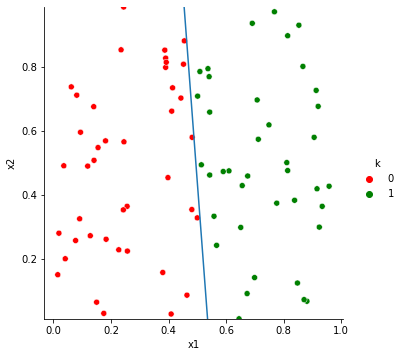

In [236]:
get_plot(train, w, bias)

<Figure size 720x576 with 0 Axes>

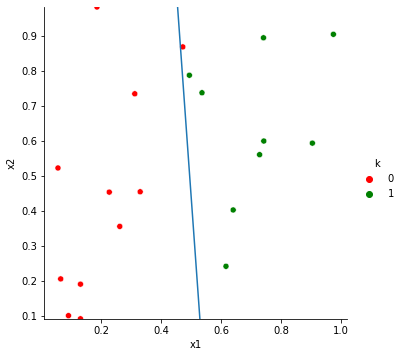

In [237]:
get_plot(test, w, bias)